# Bike Sharing Assignment

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)     # mounting google drive

Mounted at /content/drive


## Install additional libraries

In [2]:
!pip install -q autoviz==0.0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 8.2 MB/s eta 0:00:00


## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


Imported AutoViz_Class. Call by using AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)


## Data Understanding & Data Cleaning

In [4]:
df=pd.read_csv('/content/drive/MyDrive/UpGrad/Bike Sharing Assignment/day.csv')                ## creating dataframe from csv file
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.columns                       # checking total columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()                      # checking information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### As , we can see that there is no missing value in the entire dataframe.

#### Here, from the dataset we can drop these columns, 'instant', 'dteday'( as we have year, month, weekday in separate columns), casual & registered (sum of both represented as cnt).

In [7]:
df=df.drop(['instant','dteday','casual','registered'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
for column in df:                ## understanding each column with their unique values
  unique=df[column].unique()
  print(column, unique)

season [1 2 3 4]
yr [0 1]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [2 1 3]
temp [14.110847  14.902598   8.050924   8.2        9.305237   8.378268
  8.057402   6.765      5.671653   6.184153   6.932731   7.081807
  6.59567    9.566653   9.498347   7.209153   8.883347  11.979134
 10.728347   7.2775     2.4243464  3.9573897  3.9930433  9.162598
  8.9175     7.995      8.342598   8.877402   7.414153   7.879134
 10.66       7.665237   8.663464  11.719153  11.138347   9.054153
  5.526103   5.918268   7.752731   9.1225    12.977402  17.015
 10.909567  13.048701  17.869153  21.388347  16.365847  11.693897
 12.436653   7.471102   9.091299  12.121732  14.938268  11.5825
 14.082598  16.698193  10.933347  13.735      8.131653  15.750847
 15.437402  10.731299  11.9925    12.129153  15.952731  13.495847
 15.758268  13.333897  13.013031  14.973897  22.14      19.3725
 13.6325    17.647835  18.108347  14.225237  11.685     10.830847
 

#### Here, columns season, month, weekday and seasonsit have integer values for categorical type. So we need to map them in categorical columns with levels. And then we will carry out data analysis and predictive modelling.


In [10]:
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [11]:
df['mnth']=df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday']=df['weekday'].map({6:'Monday',0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday'})
df['weathersit']=df['weathersit'].map({1:'Clear',2:'Mist',3:'Light_Snow'})

In [12]:
df.info()                  ## All the column have relevant data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [13]:
df.head(10)          # Our Data is cleaned and prepared for analysis and predictive modelling part

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Saturday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sunday,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Monday,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tuesday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


## EDA

In [14]:
# First using autoviz library:
df.to_csv('updated.csv')

In [15]:
av=AutoViz_Class()

Shape of your Data Set: (730, 13)
Classifying variables in data set...
    13 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10
Could not draw Bar Plots
Time to run AutoViz (in seconds) = 3.120


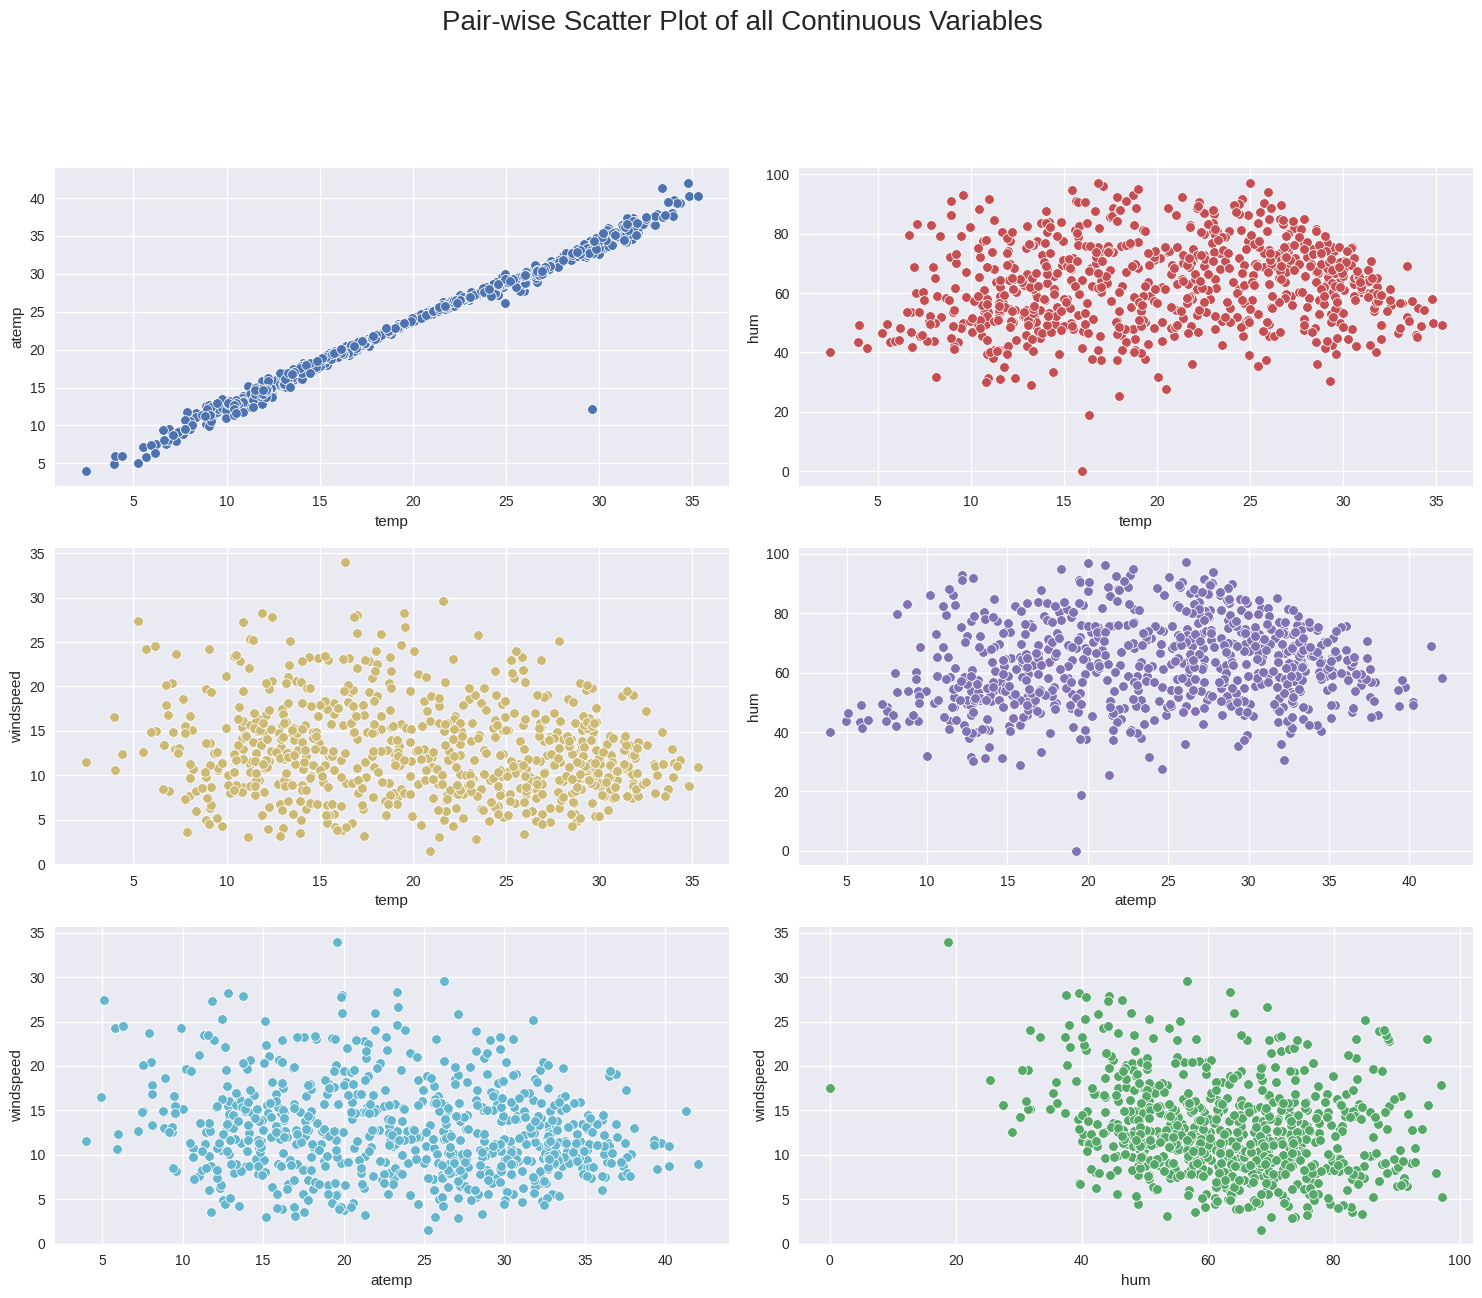

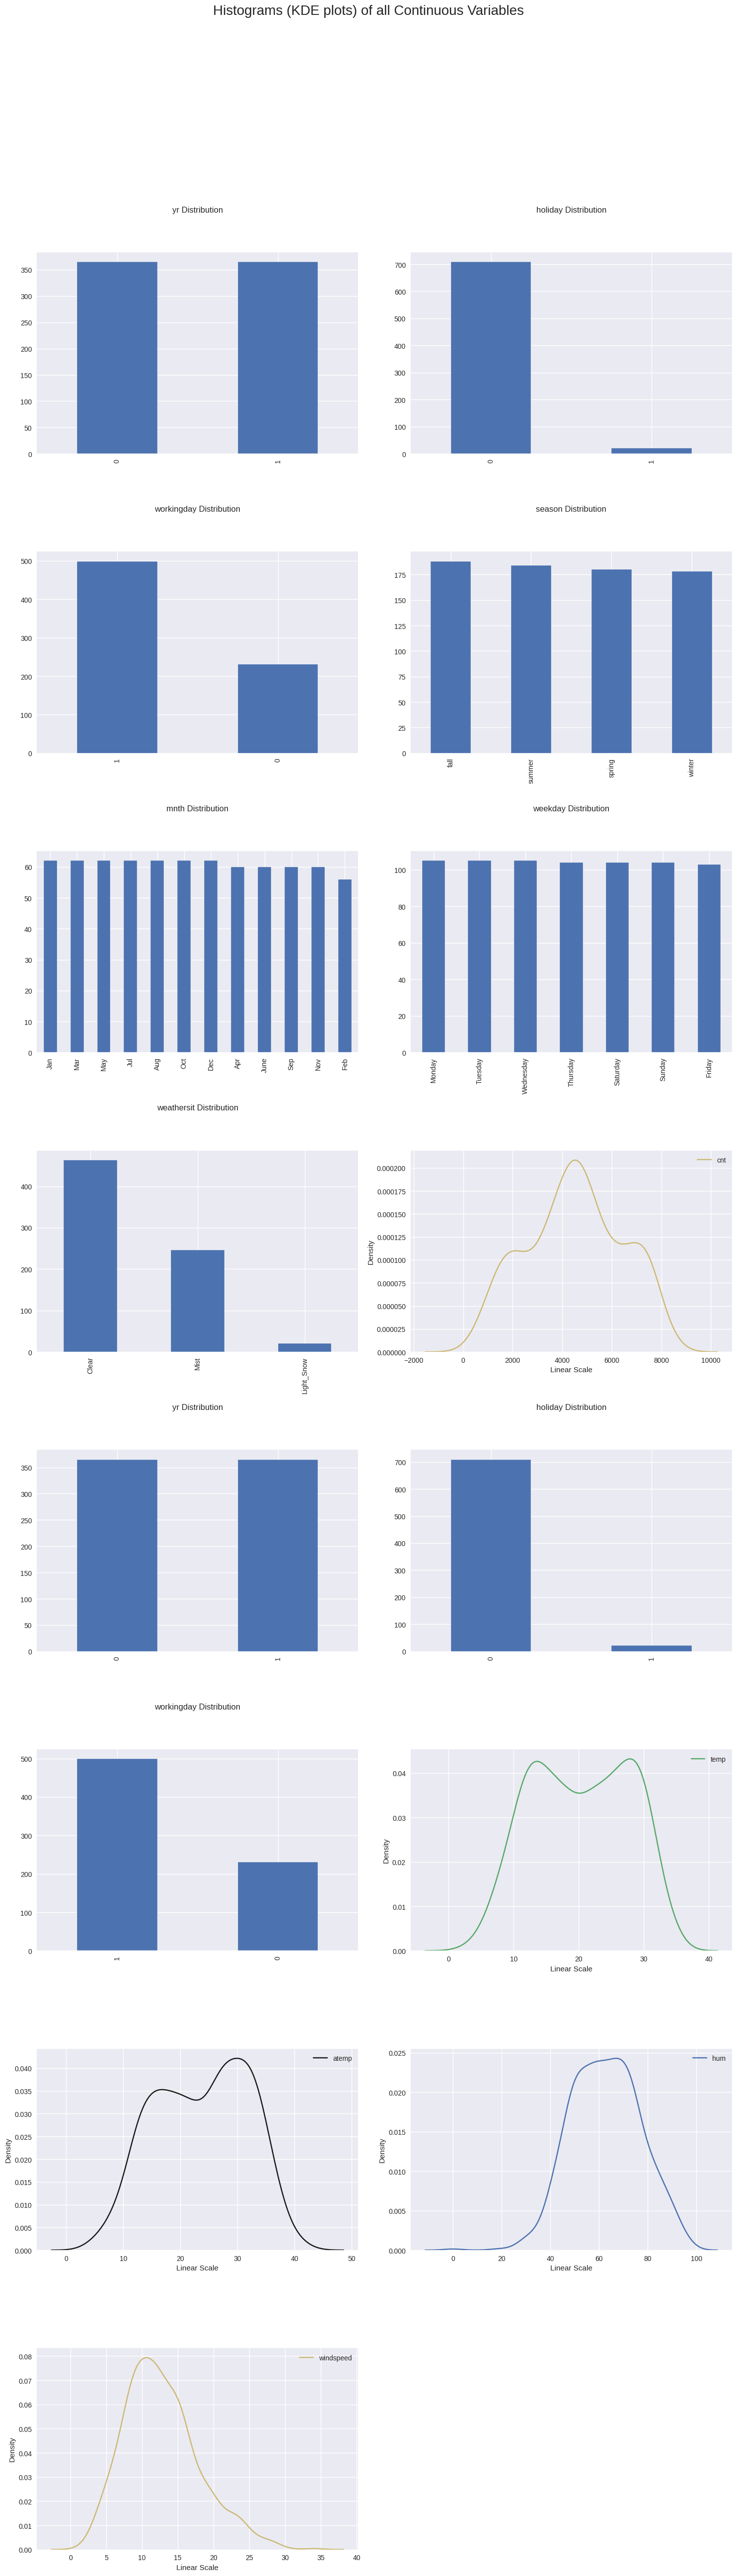

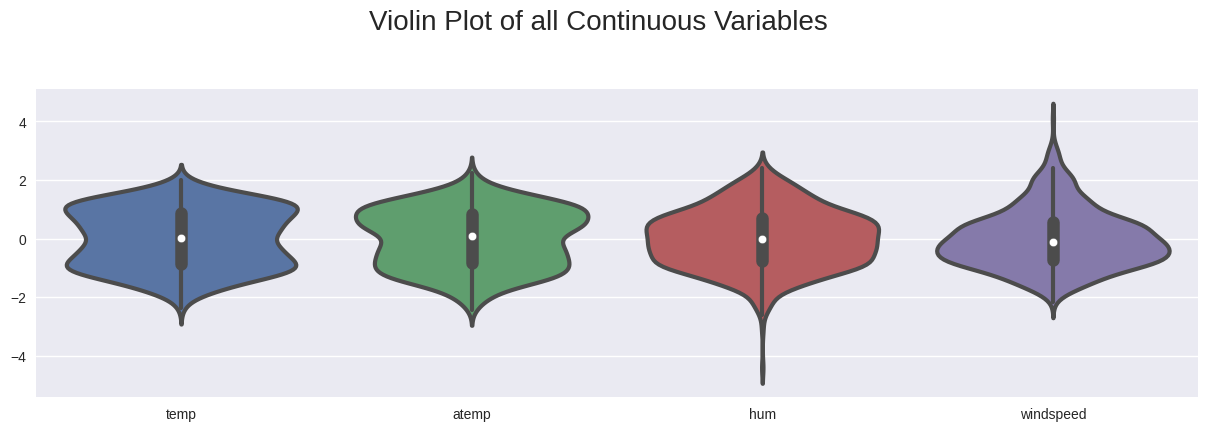

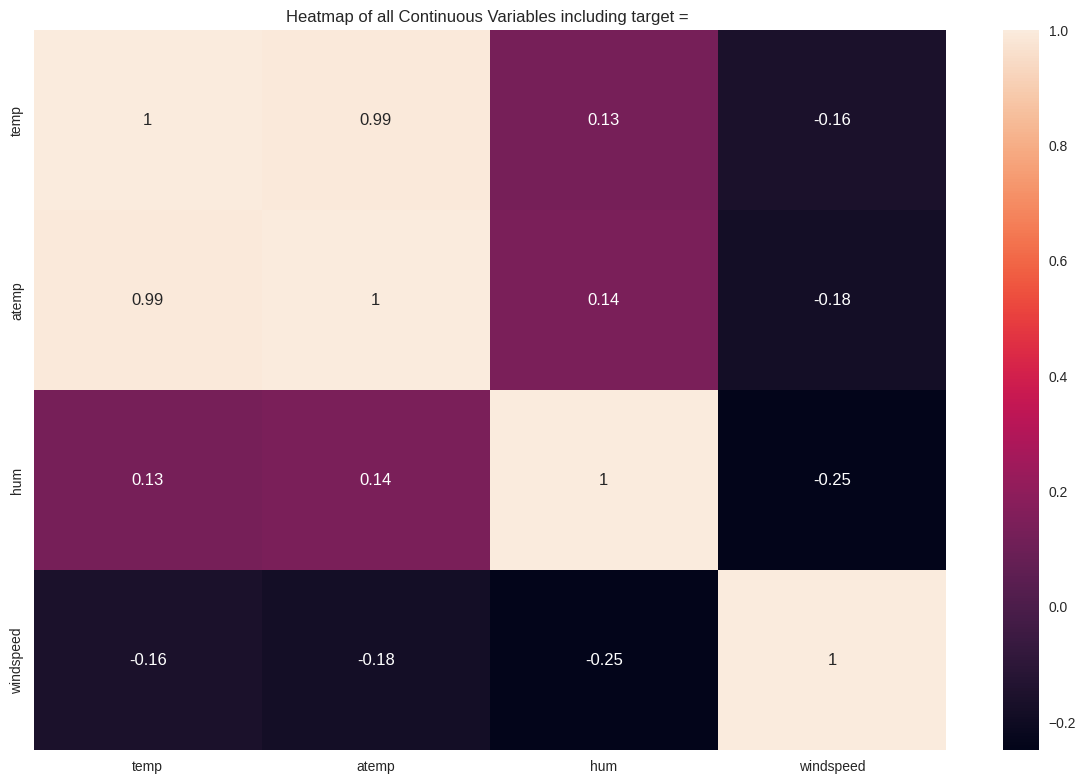

<Figure size 1500x17600 with 0 Axes>

In [16]:
filename="/content/updated.csv"
sep=",",
dft=av.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=40
)

#### Univariate Analysis has been done from the above plots. Which include KDE or histo plots of continuous variables. And count plot for the all categorical variables.

### Bi-variate Analysis between continuous variables and target variable using scatter plot

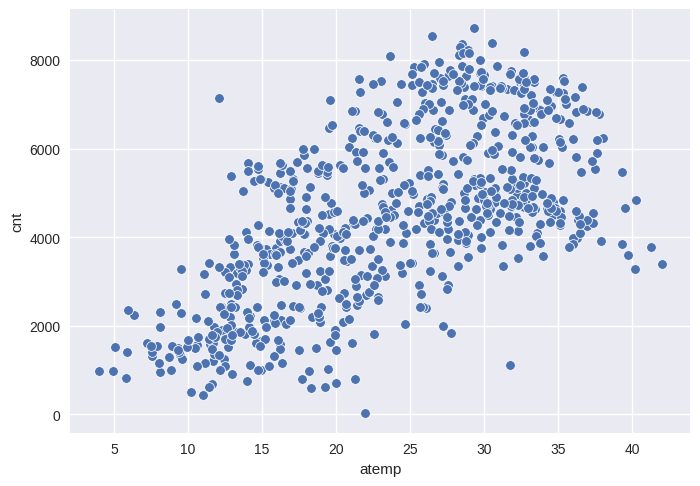

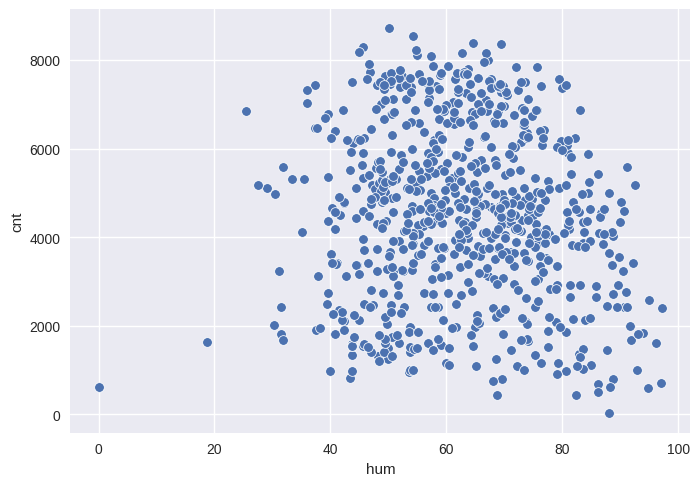

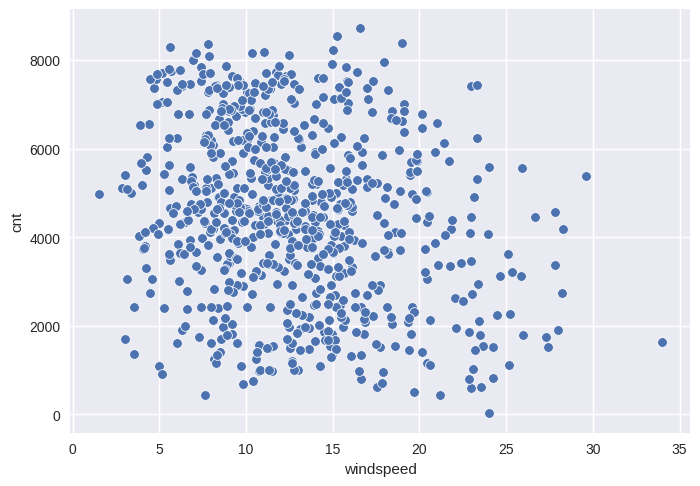

In [17]:
for continuous in ['atemp','hum','windspeed']:
  sns.scatterplot(data=df,x=continuous,y='cnt')
  plt.show()

### Bi-variate Analysis between categorical variables and target variable using bar_plot and box_plot

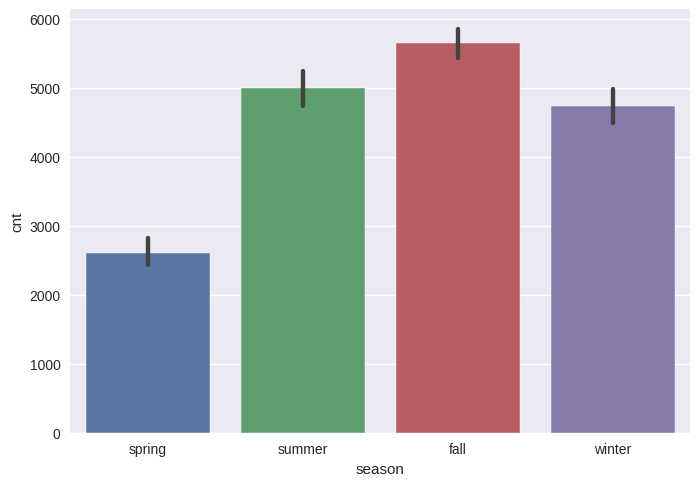

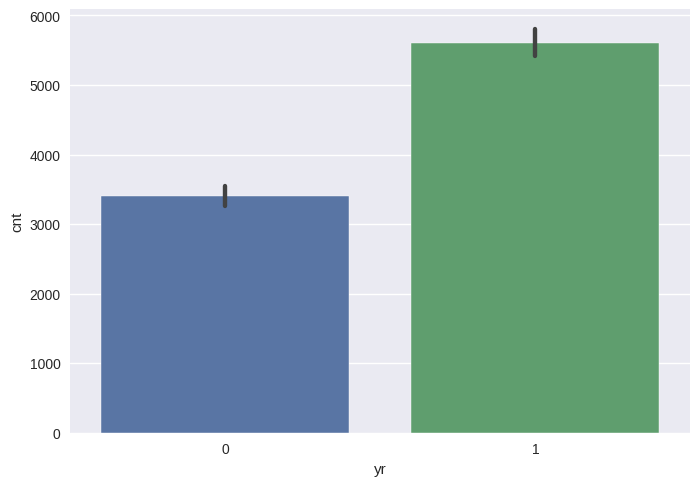

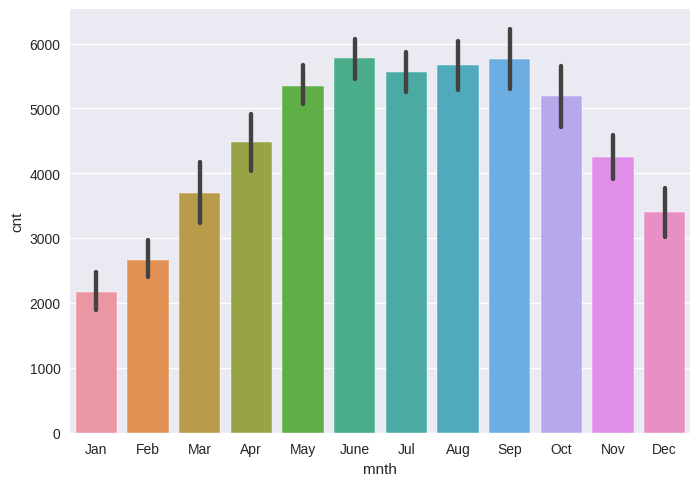

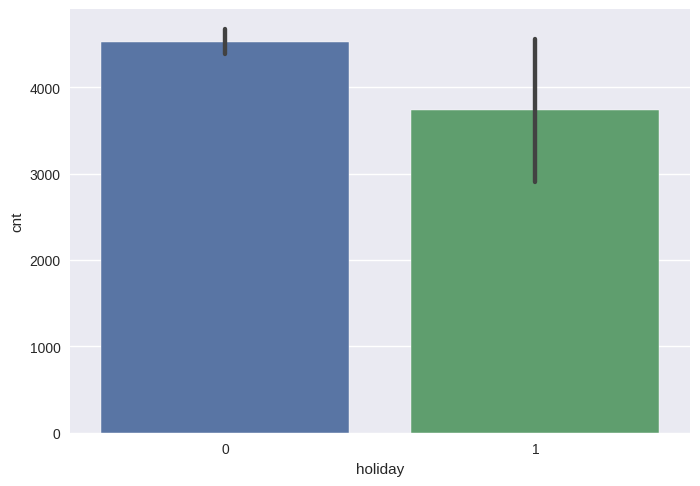

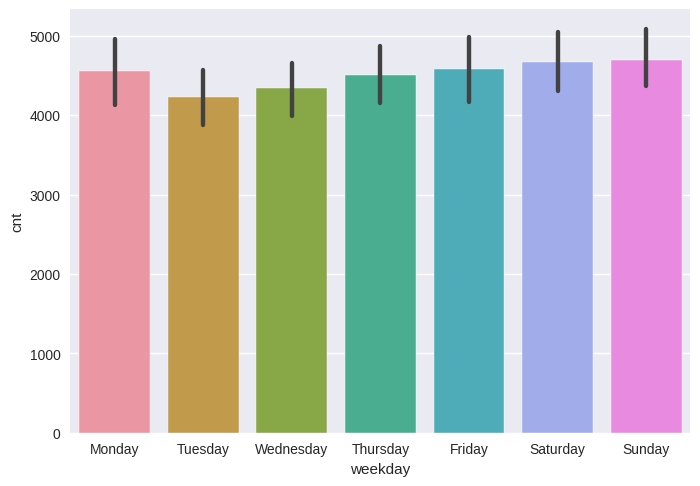

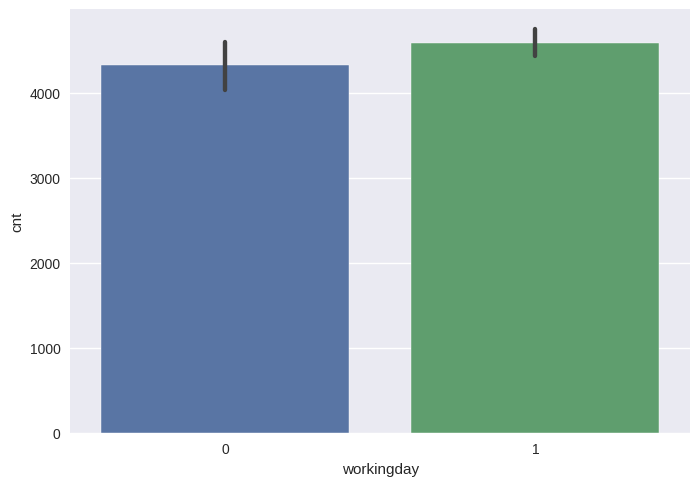

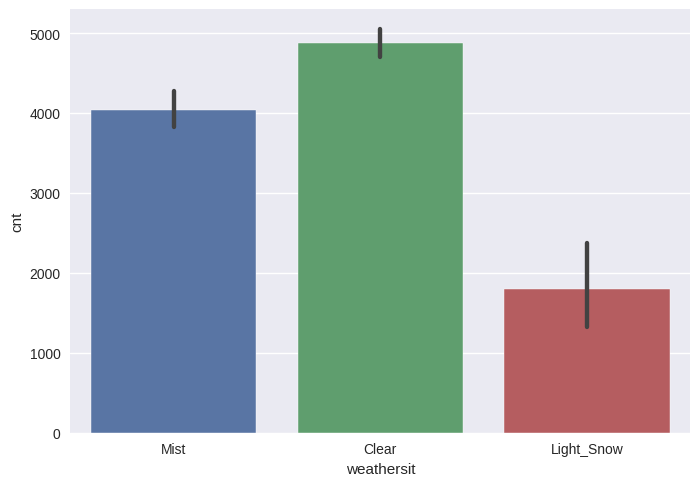

In [18]:
for cat in ['season',	'yr',	'mnth',	'holiday',	'weekday',	'workingday',	'weathersit']:
  sns.barplot(data=df,x=cat,y='cnt')
  plt.show()

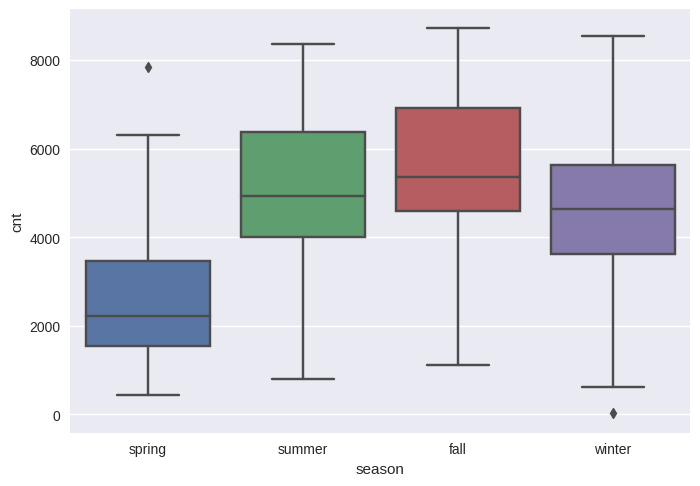

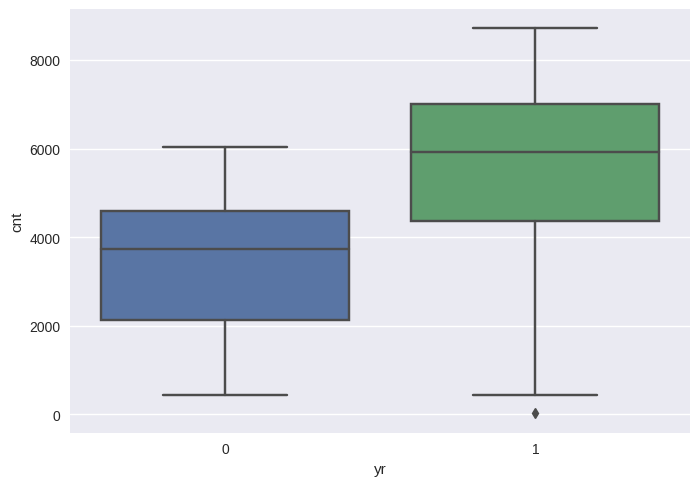

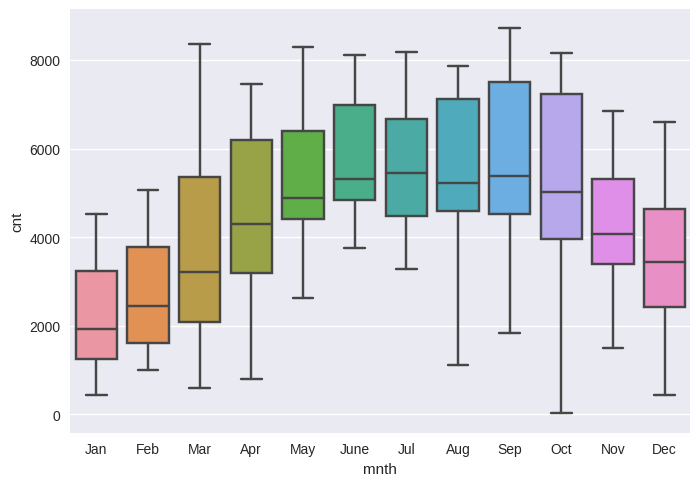

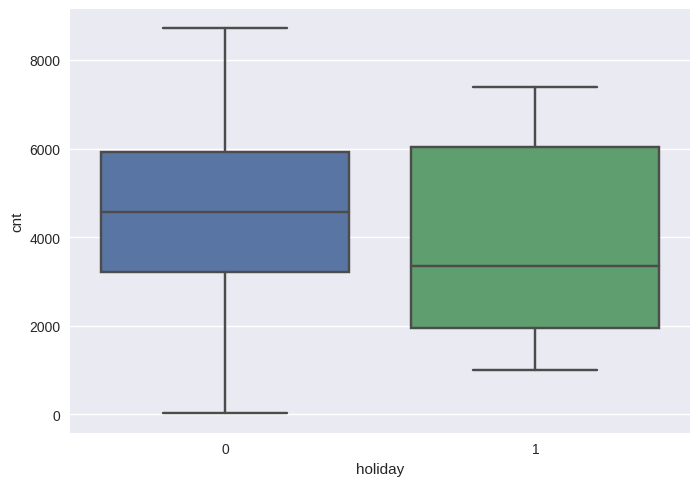

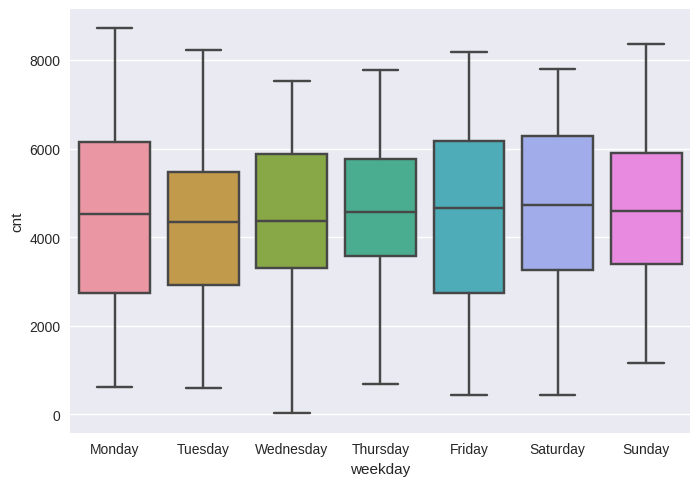

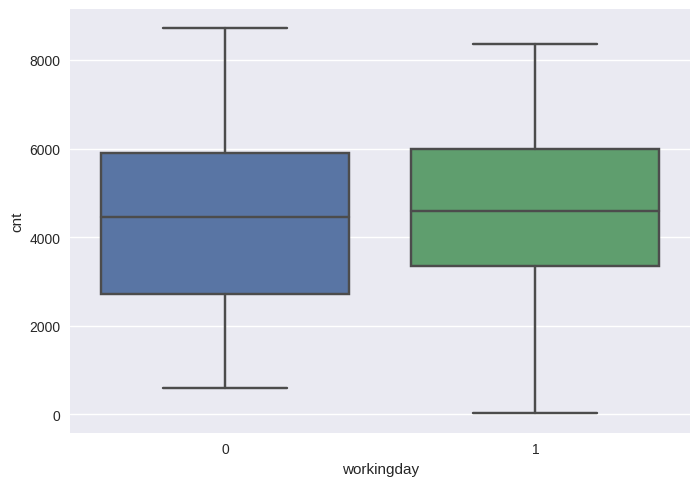

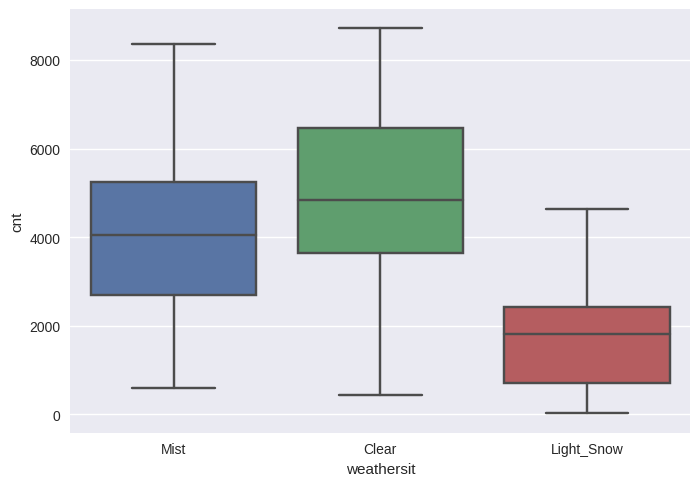

In [19]:
for cat in ['season',	'yr',	'mnth',	'holiday',	'weekday',	'workingday',	'weathersit']:
  sns.boxplot(data=df,x=cat,y='cnt')
  plt.show()

#### Observations from EDA- Uni_variate analysis:<br>
1) From Scatter plots of continuous variables it is found that,temperature and feeling temperature are highly correlated with each other, while there is no any relation between other continuous variables.<br>
2) From histograms of categorical variables it is found that, observations which show holiday are very less. All four season spring, fall, summer and winter have nearly same number of observations.  Non-working day observations are 50% of working days.<br>
3) In Weather category, days which have clear weather is around 450 days, while days which have mist weather stand around 250 days and for light_snow it show 25 days which very less.<br>
4) Heat map also represents hight correlation around 0.99 between temperature and feeling temperature. <br> 


#### Observations from EDA- Bi_variate analysis:<br>
1)  From scatter plot of total count of rental bikes and temperature , it is observed that both are nearly linearly correlated. While there is no relation between rental bikes and humidity & rental bikes and windspeed.<br>
2) For fall, summer and winter there is high demand in rental bike sharing compared to spring season- which shows very low demand.<br>
3) There is sharp increase in amount of rental bike sharing from 2018 to 2019, nearly 100% hike.<br>
4) Month playing very interesting role, from January to June there is steady rise in demand of rental bike sharing, which remains steady till september and after that it declines in stable way.<br>
5) Holiday, weekday and working day predictor variables don't have much impact on rental bike sharing-- all levels of categorical variable have same effect.<br>
6) Clear and Mist weather have high sharing of rental bike while light_snow weather has very low demand.<br>
7) Box-plot of amount of rental bike sharing with holiday as category, we see that when there is no holiday at that time there is symmetric distribution of bike sharing but when there is holiday then it is positively skewed - which means that on holiday majority of demand for rental bike sharing is huge and lying between 3000 and 6000.<br>
8) Box-plot of light_snow season depicts that, it is negatively skewed means majorty of bike sharing amount below to 2000.<br>


## Data Preparation for predictive modelling

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Outlier detection

In [21]:
## Creating dataframe which have numeric columns only to detect outliers using boxplot method
df2=df.select_dtypes(exclude='object')
df2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [22]:
## As yr, holiday, workingday has only 1 & 0, we will also drop them from df2
df2=df2[['temp','atemp','hum','windspeed','cnt']]

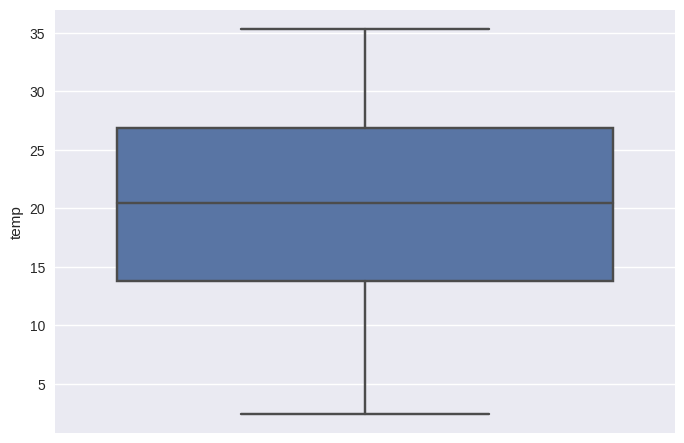

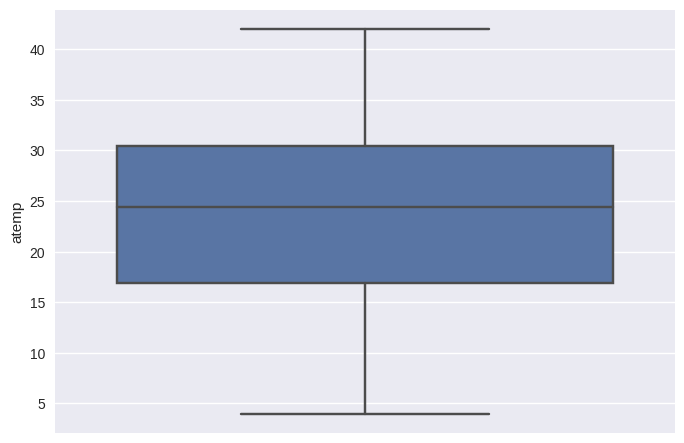

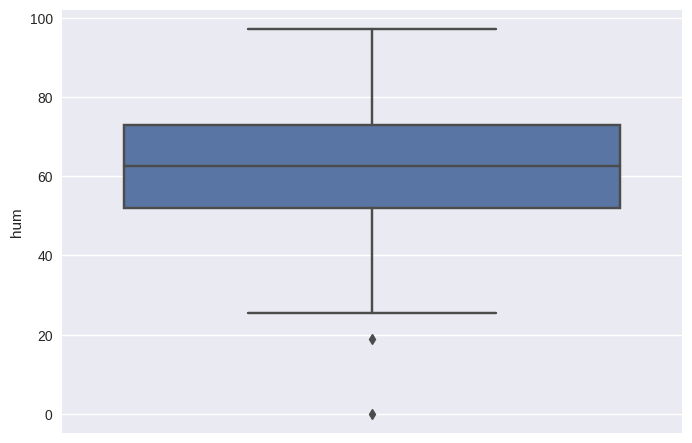

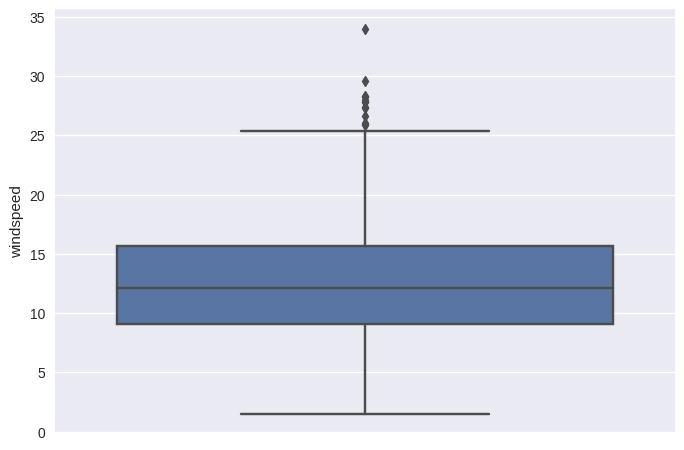

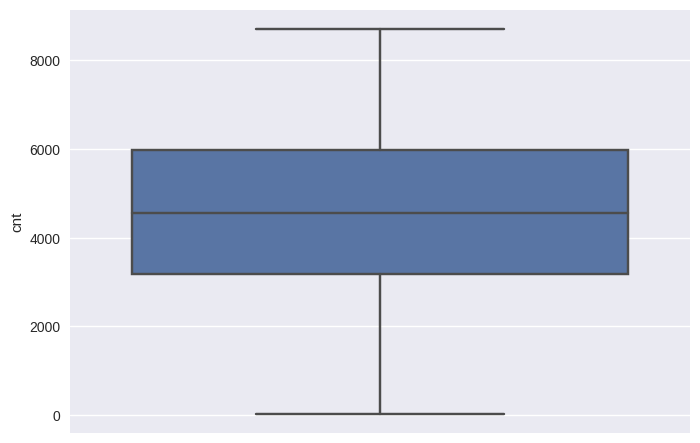

In [23]:
for column in df2.columns:
  sns.boxplot(data=df2,y=column)
  plt.show()

#### Here, we can see that there are no outliers in any numeric columns --- if it present then we will use percentile method to replace outliers with near percentile value.

### Encoding of categorical columns using one_hot encoding

In [24]:
# Get the dummy variables for the features season,mnth,weekday and weathersit
season_dummy=pd.get_dummies(df['season'],drop_first=True)
mnth_dummy=pd.get_dummies(df['mnth'],drop_first=True)
weekday_dummy=pd.get_dummies(df['weekday'],drop_first=True)
weathersit_dummy=pd.get_dummies(df['weathersit'],drop_first=True)

In [25]:
df=pd.concat([df,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy],axis=1)

In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
0,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [27]:
## Now, let's drop the original categorical columns
df=df.drop(['season','mnth','weekday','weathersit'],axis=1)

In [28]:
## As we know from EDA part that temp and atemp are highly correlated so we can drop any one of them
df=df.drop(['atemp'],axis=1)

In [29]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light_Snow', 'Mist'],
      dtype='object')

## Splitting Dataframe into training and testing sets

In [30]:
df_train,df_test=train_test_split(df,train_size=0.75,random_state=42)

#### Scaling of numeric columns using statndard scaler

In [31]:
scaler=StandardScaler()                     ## instantiate scaler object from standard scaler class

In [32]:
df_train[['temp','hum','windspeed','cnt']]=scaler.fit_transform(df_train[['temp','hum','windspeed','cnt']])

In [33]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
653,1,0,1,-0.181228,-0.543550,-0.066980,1.538275,0,0,1,...,1,0,0,0,0,1,0,0,0,0
668,1,0,1,-0.790484,0.223127,-0.277175,0.523674,0,0,1,...,1,0,0,0,0,0,0,0,0,1
694,1,0,1,-1.033272,-0.705726,-1.899069,0.276726,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,1.486217,-0.596627,-0.411638,-0.146540,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18,0,0,1,-1.149585,0.754409,0.285678,-1.495218,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Splitting df_train into X_train and y_train

In [34]:
y_train=df_train.pop('cnt')
X_train=df_train

## Building Linear regression model using SKLearn with RFE

In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## Alternative_1: keep number_features as default means half of features

In [36]:
rfe=RFE(lr)
rfe=rfe.fit(X_train,y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 6),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', False, 13),
 ('Jan', False, 8),
 ('Jul', True, 1),
 ('June', False, 12),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 15),
 ('Sunday', False, 7),
 ('Thursday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [38]:
req_col=X_train.columns[rfe.support_]
req_col

Index(['yr', 'holiday', 'workingday', 'temp', 'spring', 'winter', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Monday', 'Light_Snow', 'Mist'],
      dtype='object')

In [39]:
X_train_req=X_train[req_col]

## Building Linear regression model using statsmodel

In [40]:
X_train_lm=sm.add_constant(X_train_req)           ## adding constant Beta0

In [41]:
linear=sm.OLS(y_train,X_train_lm).fit()       ## creating linear regression model

In [42]:
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          5.52e-198
Time:                        14:01:45   Log-Likelihood:                -282.49
No. Observations:                 547   AIC:                             595.0
Df Residuals:                     532   BIC:                             659.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4474      0.058     -7.772      0.000      -0.560      -0.334
yr             1.0498      0.035     29.616      0.000       0.980       1.119
holiday       -0.1653      0.113     -1.463      0.144      -0.387       0.057
workingday     0.1944      0.050      3.881      0.000       0.096       0.293
temp           0.4147      0.032     12.874      0.000       0.351       0.478
spring        -0.6628      0.071     -9.398      0.000      -0.801      -0.524
winter         0.3982      0.060      6.691      0.000       0.281       0.515
Dec           -0.2824      0.076     -3.723      0.000      -0.431      -0.133
Jul           -0.2104      0.071     -2.982      0.003      -0.349      -0.072
Mar            0.2213      0.076      2.925      0.004       0.073       0.370
Nov           -0.3598      0.079     -4.542      0.000      -0.515      -0.204
Sep            0.2395      0.066      3.646      0.000       0.110       0.369
Monday         0.2169      0.065      3.339      0.001       0.089       0.344
Light_Snow    -1.2380      0.104    -11.894      0.000      -1.442      -1.034
Mist          -0.3642      0.038     -9.580      0.000      -0.439      -0.290
==============================================================================
Omnibus:                       79.513   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.760
Skew:                          -0.760   Prob(JB):                     2.29e-42
Kurtosis:                       5.471   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### here, p-value for holiday feature is 0.144 which very high than 0.05 so let's remove holiday and then redevelop model

In [43]:
X_train_req=X_train_req.drop(['holiday'],axis=1)

In [44]:
X_train_lm=sm.add_constant(X_train_req)
linear=sm.OLS(y_train,X_train_lm).fit() 
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.09e-198
Time:                        14:01:46   Log-Likelihood:                -283.59
No. Observations:                 547   AIC:                             595.2
Df Residuals:                     533   BIC:                             655.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4720      0.055     -8.566      0.000      -0.580      -0.364
yr             1.0499      0.035     29.587      0.000       0.980       1.120
workingday     0.2202      0.047      4.688      0.000       0.128       0.312
temp           0.4142      0.032     12.845      0.000       0.351       0.478
spring        -0.6672      0.071     -9.458      0.000      -0.806      -0.529
winter         0.3981      0.060      6.684      0.000       0.281       0.515
Dec           -0.2856      0.076     -3.763      0.000      -0.435      -0.136
Jul           -0.2094      0.071     -2.964      0.003      -0.348      -0.071
Mar            0.2256      0.076      2.981      0.003       0.077       0.374
Nov           -0.3690      0.079     -4.668      0.000      -0.524      -0.214
Sep            0.2390      0.066      3.635      0.000       0.110       0.368
Monday         0.2430      0.063      3.886      0.000       0.120       0.366
Light_Snow    -1.2358      0.104    -11.861      0.000      -1.440      -1.031
Mist          -0.3631      0.038     -9.542      0.000      -0.438      -0.288
==============================================================================
Omnibus:                       81.709   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.849
Skew:                          -0.790   Prob(JB):                     3.61e-42
Kurtosis:                       5.424   Cond. No.                         8.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the summary we noticed that R_sq remained as it is so holiday should be dropped.

In [45]:
## Calculate the VIF for each feature:
vif=pd.DataFrame()
X=X_train_req
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [46]:
vif

,Features,VIF
2,temp,3.13
3,spring,2.95
1,workingday,2.69
4,winter,2.66
0,yr,1.92
8,Nov,1.88
12,Mist,1.53
6,Jul,1.47
5,Dec,1.39
10,Monday,1.31


#### no feature shows value of VIF >=5, so there is no multicollinearity in model

## Residual Analysis

##### In residual analysis we will check the distribution of error terms, assumption for linear regression is that, error term should be normally distributed with mean value zero

In [47]:
y_train_pred=linear.predict(X_train_lm)

Text(0.5, 0.98, 'Error terms')

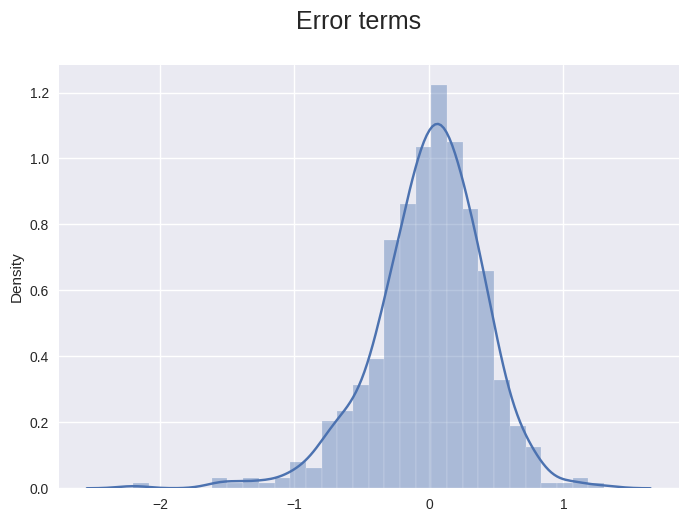

In [48]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred))
fig.suptitle('Error terms',fontsize=18)

##### Error terms is normally distributed with mean value 0

## Making predictions


In [49]:
## scaler transform of df_test
df_test[['temp','hum','windspeed','cnt']]=scaler.transform(df_test[['temp','hum','windspeed','cnt']])

In [50]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test=X_test[X_train_req.columns]            ## same columns of X_train_req

In [51]:
X_test_lm=sm.add_constant(X_test)           ## adding constant

In [52]:
y_pred=linear.predict(X_test_lm)            ## predictions from X_test_lm dataframe

## Model Evaluation

Text(0, 0.5, 'y_pred')

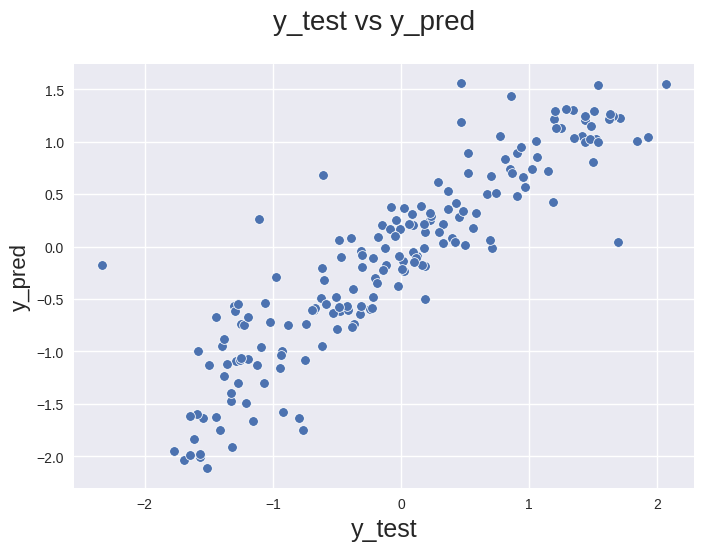

In [53]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.scatterplot(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

#### From scatter plot we can say that generalized model is developed.